Importation des biblioth√®ques

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
import os

# Charger les donn√©es
file_path = "C:\\Users\\ADMIN\\Desktop\\air_paradise_chatbot\\data\\final\\dataset_final.csv"
if os.path.exists(file_path):
	df = pd.read_csv(file_path)
	
	# V√©rification des donn√©es
	print(df.info())
	print(df.head())
else:
	print(f"[ERROR] Le fichier sp√©cifi√© n'existe pas : {file_path}")
	df = None  # Assurez-vous que df est d√©fini m√™me si le fichier est manquant

if df is not None:
	# Conversion des bool√©ens en int (n√©cessaire pour les mod√®les)
	df["DEPARTURE_PERIOD_matin"] = df["DEPARTURE_PERIOD_matin"].astype(int)
	df["DEPARTURE_PERIOD_soir"] = df["DEPARTURE_PERIOD_soir"].astype(int)

	# S√©paration des features (X) et de la cible (y)
	X = df.drop(columns=["PRICE_USD"])
	y = df["PRICE_USD"]
else:
	print("[ERROR] Impossible de continuer car les donn√©es n'ont pas √©t√© charg√©es.")
	X, y = None, None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3427300 entries, 0 to 3427299
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   DISTANCE                int64  
 1   SCHEDULED_TIME          float64
 2   MONTH                   int64  
 3   DAY_OF_WEEK             int64  
 4   PRICE_USD               float64
 5   col_0                   int64  
 6   col_1                   int64  
 7   col_2                   int64  
 8   col_3                   int64  
 9   col_4                   int64  
 10  col_5                   int64  
 11  col_6                   int64  
 12  col_7                   int64  
 13  DEPARTURE_PERIOD_matin  bool   
 14  DEPARTURE_PERIOD_soir   bool   
dtypes: bool(2), float64(2), int64(11)
memory usage: 346.5 MB
None
   DISTANCE  SCHEDULED_TIME  MONTH  DAY_OF_WEEK  PRICE_USD  col_0  col_1  \
0      1448           205.0      1            4     523.85      0      0   
1      2296           286.0      1     

S√©paration train/test et normalisation

In [6]:
# S√©paration en jeu d'entra√Ænement et test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation uniquement pour la R√©gression Lin√©aire
scaler = StandardScaler()
cols_to_scale = ["DISTANCE", "SCHEDULED_TIME", "MONTH", "DAY_OF_WEEK"]
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

Entra√Ænement des mod√®les

In [7]:
models = {
    "R√©gression Lin√©aire": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n[INFO] Entra√Ænement du mod√®le: {name}")
    
    # S√©lectionner les donn√©es normalis√©es pour la r√©gression lin√©aire
    if name == "R√©gression Lin√©aire":
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    
    # √âvaluation sur train et test
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    
    results[name] = {
        "Train MAE": train_mae, "Test MAE": test_mae,
        "Train RMSE": train_rmse, "Test RMSE": test_rmse,
        "Train R2": train_r2, "Test R2": test_r2
    }
    
    print(f"Train - MAE: {train_mae:.2f}, RMSE: {train_rmse:.2f}, R¬≤: {train_r2:.2f}")
    print(f"Test  - MAE: {test_mae:.2f}, RMSE: {test_rmse:.2f}, R¬≤: {test_r2:.2f}")


[INFO] Entra√Ænement du mod√®le: R√©gression Lin√©aire
Train - MAE: 37.51, RMSE: 57.72, R¬≤: 0.89
Test  - MAE: 37.46, RMSE: 57.75, R¬≤: 0.89

[INFO] Entra√Ænement du mod√®le: Random Forest
Train - MAE: 23.62, RMSE: 36.81, R¬≤: 0.96
Test  - MAE: 32.08, RMSE: 50.24, R¬≤: 0.92

[INFO] Entra√Ænement du mod√®le: XGBoost
Train - MAE: 29.51, RMSE: 45.50, R¬≤: 0.93
Test  - MAE: 29.54, RMSE: 45.68, R¬≤: 0.93


Comparaison et visualisation des r√©sultats

                     Train MAE   Test MAE  Train RMSE  Test RMSE  Train R2  \
R√©gression Lin√©aire  37.514953  37.456985   57.724772  57.749716  0.894380   
Random Forest        23.615297  32.079736   36.810995  50.243810  0.957049   
XGBoost              29.511761  29.540723   45.497796  45.683474  0.934385   

                      Test R2  
R√©gression Lin√©aire  0.894492  
Random Forest        0.920136  
XGBoost              0.933976  


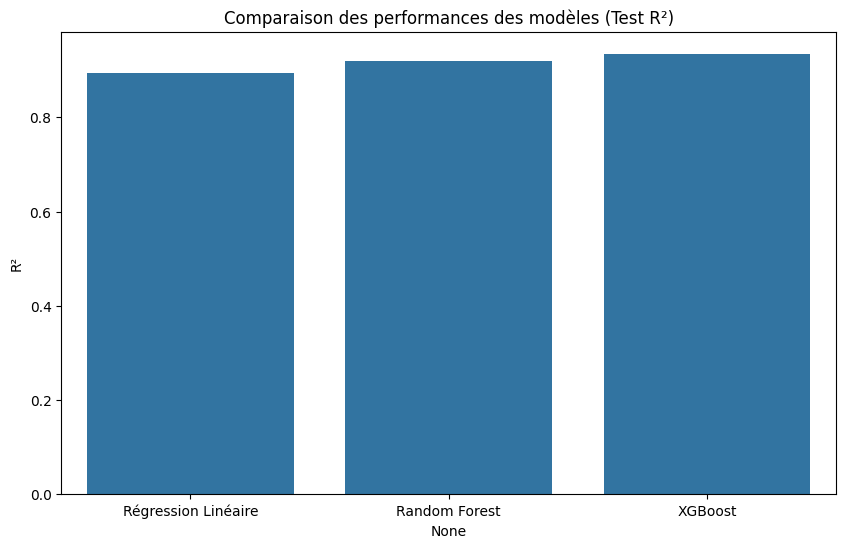

In [8]:
df_results = pd.DataFrame(results).T
print(df_results)

# Visualisation des performances
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x=df_results.index, y="Test R2")
plt.title("Comparaison des performances des mod√®les (Test R¬≤)")
plt.ylabel("R¬≤")
plt.show()

Visualisation des erreurs

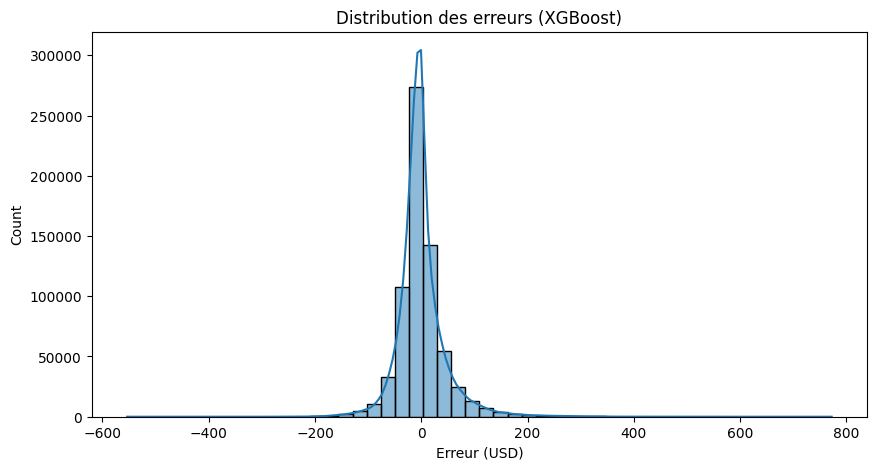

In [9]:
best_model_name = max(results, key=lambda k: results[k]['Test R2'])
best_model = models[best_model_name]
y_test_pred_best = best_model.predict(X_test)

# Histogramme des erreurs
errors = y_test - y_test_pred_best
plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=50, kde=True)
plt.title(f"Distribution des erreurs ({best_model_name})")
plt.xlabel("Erreur (USD)")
plt.show()

Sauvegarde du modele

In [10]:
# Sauvegarde du mod√®le entra√Æn√©
import joblib
model_path = "C:\\Users\\ADMIN\\Desktop\\air_paradise_chatbot\\models\\best_flight_price_model.pkl"
joblib.dump(model, model_path)

print(f"[INFO] Mod√®le XGBoost sauvegard√© sous : {model_path}")

[INFO] Mod√®le XGBoost sauvegard√© sous : C:\Users\ADMIN\Desktop\air_paradise_chatbot\models\best_flight_price_model.pkl


Charger le mod√®le et pr√©dire les prix

In [12]:
model = joblib.load(model_path)

# Charger les nouvelles donn√©es √† pr√©dire
df = pd.read_csv("C:\\Users\\ADMIN\\Desktop\\air_paradise_chatbot\\data\\final\\dataset_final.csv")

# Supprimer "PRICE_USD" pour √©viter la fuite de donn√©es
X_to_predict = df.drop(columns=["PRICE_USD"], errors="ignore")

# Pr√©dire les prix des vols
predictions = model.predict(X_to_predict)

# Ajouter les pr√©dictions au dataset
df["PREDICTED_PRICE_USD"] = predictions

# Afficher un aper√ßu des r√©sultats
print(df[["DISTANCE", "SCHEDULED_TIME", "MONTH", "DAY_OF_WEEK", "PREDICTED_PRICE_USD"]].head())

   DISTANCE  SCHEDULED_TIME  MONTH  DAY_OF_WEEK  PREDICTED_PRICE_USD
0      1448           205.0      1            4           452.066467
1      2296           286.0      1            4           742.170776
2      1448           235.0      1            4           546.478149
3      2125           273.0      1            4           728.523193
4      1448           204.0      1            4           447.028748


In [ ]:
# Sauvegarder les pr√©dictions
predictions_path = "C:\\Users\\ADMIN\\Desktop\\air_paradise_chatbot\\data\\final\\final_dataset_with_predictions.csv"
df.to_csv(predictions_path, index=False)

In [13]:
print(df["PREDICTED_PRICE_USD"].describe())

count    3.427300e+06
mean     2.477064e+02
std      1.714928e+02
min      4.137475e+01
25%      1.302117e+02
50%      1.991857e+02
75%      3.102405e+02
max      2.174795e+03
Name: PREDICTED_PRICE_USD, dtype: float64


Distribution des prix predits

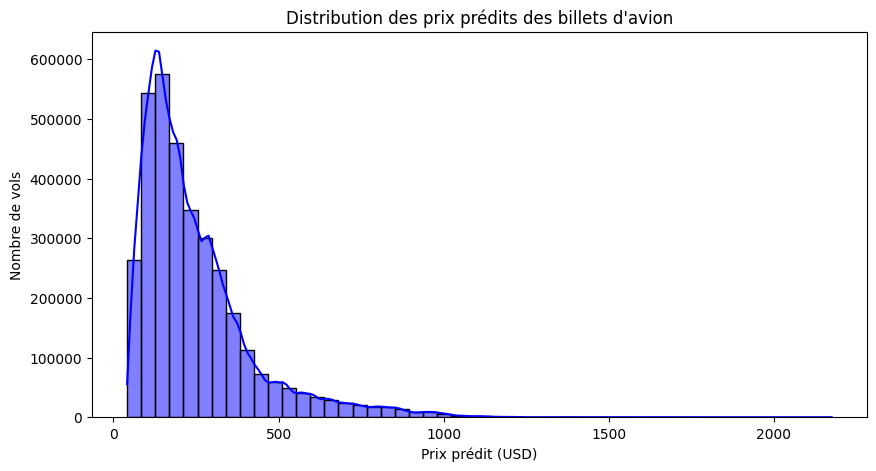

In [14]:
# Visualisation de la distribution des prix pr√©dits
plt.figure(figsize=(10, 5))
sns.histplot(df["PREDICTED_PRICE_USD"], bins=50, kde=True, color="blue")
plt.xlabel("Prix pr√©dit (USD)")
plt.ylabel("Nombre de vols")
plt.title("Distribution des prix pr√©dits des billets d'avion")
plt.show()

comparaison des prix predits avec les prix reels

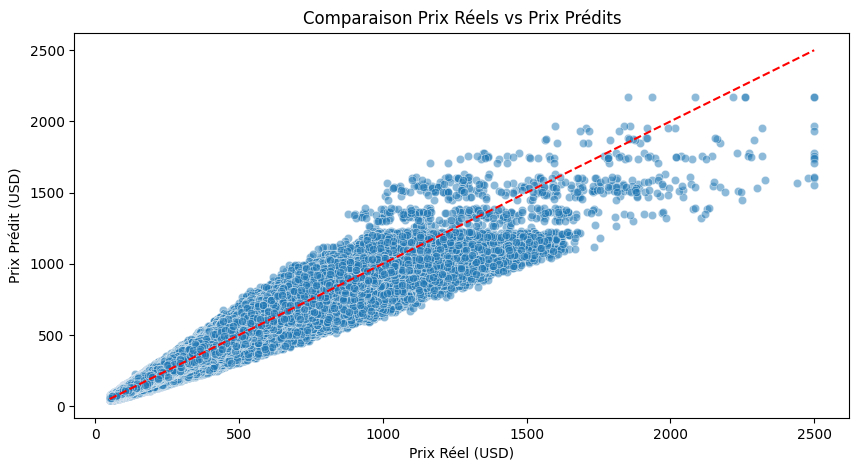

In [15]:
if "PRICE_USD" in df.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df["PRICE_USD"], y=df["PREDICTED_PRICE_USD"], alpha=0.5)
    plt.plot([df["PRICE_USD"].min(), df["PRICE_USD"].max()], 
            [df["PRICE_USD"].min(), df["PRICE_USD"].max()], '--', color='red')
    plt.xlabel("Prix R√©el (USD)")
    plt.ylabel("Prix Pr√©dit (USD)")
    plt.title("Comparaison Prix R√©els vs Prix Pr√©dits")
    plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcul des erreurs sur le dataset pr√©dit
mae = mean_absolute_error(df["PRICE_USD"], df["PREDICTED_PRICE_USD"])
rmse = np.sqrt(mean_squared_error(df["PRICE_USD"], df["PREDICTED_PRICE_USD"]))
r2 = r2_score(df["PRICE_USD"], df["PREDICTED_PRICE_USD"])

print(f"üìä Performance actuelle :\n - MAE : {mae:.2f} $\n - RMSE : {rmse:.2f} $\n - R¬≤ : {r2:.4f}")


üìä Performance actuelle :
 - MAE : 29.52 $
 - RMSE : 45.53 $
 - R¬≤ : 0.9343


c:\Users\ADMIN\Desktop\air_paradise_chatbot\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


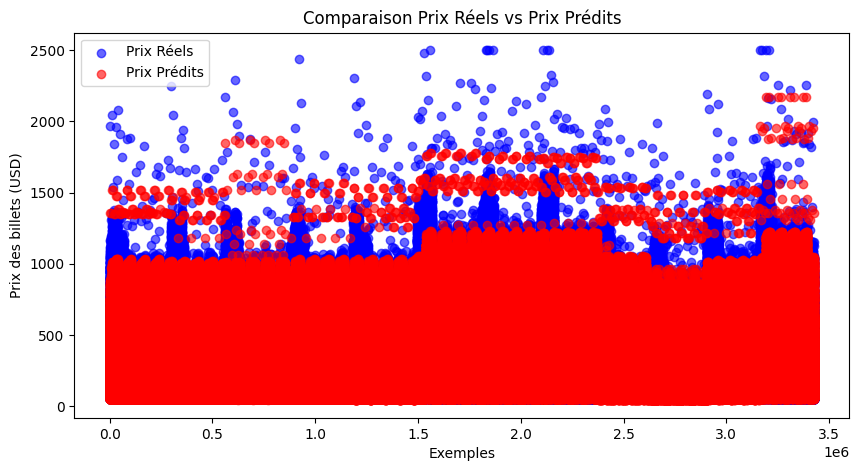

In [17]:
import matplotlib.pyplot as plt

# Charger les donn√©es r√©elles
y_real = df["PRICE_USD"][:len(predictions)]  # Assure que les tailles correspondent

# Tracer la comparaison
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_real)), y_real, color="blue", label="Prix R√©els", alpha=0.6)
plt.scatter(range(len(predictions)), predictions, color="red", label="Prix Pr√©dits", alpha=0.6)
plt.xlabel("Exemples")
plt.ylabel("Prix des billets (USD)")
plt.title("Comparaison Prix R√©els vs Prix Pr√©dits")
plt.legend()
plt.show()

Ajouter les prix predits √† notre dataset_cleaned_standard

verififions le taille

In [31]:
print(len(df["PREDICTED_PRICE_USD"]))
print

3427300


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [33]:
df_cleaned_standard = pd.read_csv("C:\\Users\\ADMIN\\Desktop\\air_paradise_chatbot\\data\\cleaned\\dataset_cleaned_standard.csv")
print(len(df_cleaned_standard))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_46708\1922159394.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned_standard = pd.read_csv("C:\\Users\\ADMIN\\Desktop\\air_paradise_chatbot\\data\\cleaned\\dataset_cleaned_standard.csv")


3427300


Ajout de la colonne au Dataframe

In [35]:
# Ajouter la colonne des pr√©dictions depuis un autre DataFrame (ici 'df')
df_cleaned_standard["PREDICTED_PRICE_USD"] = df["PREDICTED_PRICE_USD"]

# Sauvegarder si besoin
df_cleaned_standard.to_csv("C:\\Users\\ADMIN\\Desktop\\air_paradise_chatbot\\data\\final\\dataset_cleaned_standard_with_predictions.csv", index=False)

Creation du fichier final pour la realisation du chatbot

In [30]:
df_cleaned_standard_path = "C:\\Users\\ADMIN\\Desktop\\air_paradise_chatbot\\data\\final\\cleaned_standard_with_predictions.csv"
df_cleaned_standard.to_csv(df_cleaned_standard_path, index=False)
print(f"[INFO] Dataset cleaned avec les pr√©dictions sauvegard√© sous : {df_cleaned_standard_path}")

[INFO] Dataset cleaned avec les pr√©dictions sauvegard√© sous : C:\Users\ADMIN\Desktop\air_paradise_chatbot\data\final\cleaned_standard_with_predictions.csv
